## 2. Multivariate Linear Regression
In this notebook, we'll adjust our Linear Regression algorithm in order to fit a plane to two features in the Iris dataset. This implementation will be extensible to any number of features.

In [1]:
import pandas as pd
iris_df = pd.read_csv('../data/iris_csv.csv')
iris_df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Again, we'll ignore the class, but let's look at both petallength vs. petalwidth and sepallength vs. petalwidth

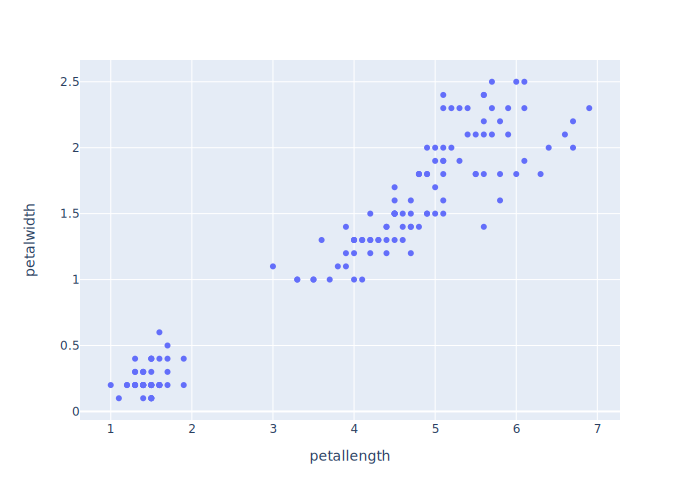

In [10]:
import plotly.express as px
plot = px.scatter(iris_df, x='petallength', y='petalwidth')
plot.show("svg")

We'll be using Gradient Descent for this regression, so let's define a few functions that we can perform this on.

First, we need a some kind of 'data structure' to store the 'weight(s)' of our linear regression. We can use a standard variable (or vector for multiple features) $\theta$ to accomplish this. Then to apply the weights, we can define a function $h_\theta(x)$, which takes our input features (petal length, in this case), applies a weight $\theta$, and outputs something that hopefully resembles an accurate prediction (of petal width):

$$h_Θ(x) = \theta x$$

Since we'll be extending this to multiple features later, let's go ahead an generalize this. Say for $j$ in features $1, ..., n$ (or petal length, ..., sepal length), we apply a different $\theta$ for each:

$$h_Θ(x) =  \sum_{j=1}^{n} \theta_j x_j$$

Nice, our model function is done.

Next, we need an objective (or loss) function to guide the gradient descent. This function should tell us, for a given prediction, how far off are we from the actual value? Squared error will work fine here, and we'll call it $J(\theta)$. For training samples $i$ in $1, ..., m$ and their corresponding acutal outputs $y$, we apply the following function to get the total loss of our training set:
$$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_Θ(x^{(i)}) - y^{(i)} )^2 $$

Finally, we'll compute the Jacobian of this function, or the first derivative with respect to each of our $j$ features:
$$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{\partial}{\partial \theta_j} \frac{1}{2}  (h_Θ(x) - y )^2 $$

Apply chain rule:
$$  \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{2} \times 2 \times (h_Θ(x) - y) \times \frac{\partial}{\partial \theta_j} (h_Θ(x) - y) $$

Cancel and expand $h_Θ(x)$:
$$\frac{\partial}{\partial \theta_j} J(\theta) = (h_Θ(x) - y) \times \frac{\partial}{\partial \theta_j} (\theta_0 x_0 + ... + \theta_n x_n - y) $$

At this point, we can plug in $j$, as it will collapse the summation, since the only the derivative of the term with $\theta_j$ will be non-zero. Let's set j = 0 to demonstrate:

$$\frac{\partial}{\partial \theta_0} J(\theta) = (h_Θ(x) - y) \times (x_0 + ... + 0 - 0) $$

$$\frac{\partial}{\partial \theta_0} J(\theta) = (h_Θ(x) - y) \times x_0 $$


Finally, we can use this to update $\theta$ each iteration of the algorithm, with a learning rate $\alpha$:
$$\theta_j := \theta_j - \alpha \times (h_Θ(x) - y) \times x_0$$


At this point, we keep applying the update to $\theta_j$ until the algorithm converges. Below, I've implemented this algorithm in Python:

In [11]:
α = .0001 # Learning rate
Θ = [0] # Parameters
samples = iris_df[['petallength', 'petalwidth']]

def h_Θ(theta, features):
    # This is our model
    total = 0
    for ind in range(len(theta)):
        total += theta[ind] * [features][ind]
    return total

def J_Θ(samples): 
    # This is the loss function
    total = 0
    for ind, sample in samples.iterrows():
        total += (h_Θ(Θ, sample['petallength']) - sample['petalwidth'])**2
    return .5 * total

def dΘ_j_J_Θ(samples, j):
    # This is the derivative of our loss, for gradient descent
    total = 0
    for ind, sample in samples.iterrows():
        total += (h_Θ(Θ, sample['petallength']) - sample['petalwidth']) * sample['petallength']
    return total

for i in range(50):
    for j, _ in enumerate(Θ):
        if i % 10 == 0: 
            print(f"Theta {i}: {Θ[j]}")
            print(f"Loss {i}: {J_Θ(samples)}")
        Θ[j] = Θ[j] - α * dΘ_j_J_Θ(samples, j)

Theta 0: 0
Loss 0: 151.15000000000006
Theta 10: 0.3194691478238425
Loss 10: 5.352077390699372
Theta 20: 0.3355649161865211
Loss 20: 4.981979238956001
Theta 30: 0.3363758669808302
Loss 30: 4.981039769864312
Theta 40: 0.33641672499866276
Loss 40: 4.981037385085652


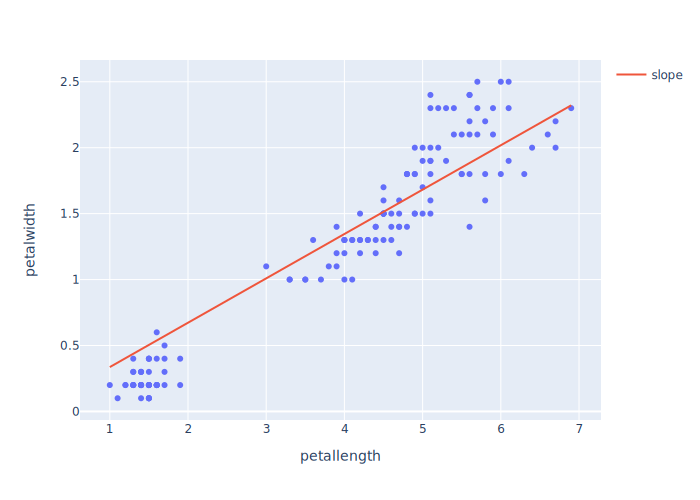

In [12]:
# Thanks to Dmitry.Balabka for the code snippet to plot a line on a scatter given a slope
# Source: https://community.plotly.com/t/plotly-python-how-to-add-a-line-with-given-slope-and-intercapt-to-a-given-x-y-plot/44970/6

import plotly.graph_objects as go

fig = px.scatter(samples, 'petallength', 'petalwidth')
fig.add_trace(
    go.Scatter(x=samples['petallength'], y=Θ[0]*samples['petallength'], name="slope", line_shape='linear')
)
fig.show("svg")

Bada-bing bada-boom! Looks like that worked pretty well. Next I'll adapt this code to work with multiple features to predict the outcome.